<a href="https://colab.research.google.com/github/charlie11438/note/blob/master/python_stats/stats0507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 統計分析筆記

## 2019-05-06 basic

## 2019-05-07 process output

In [0]:
#導入模組
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [0]:
#產生亂數資料(常態分配)
np.random.seed(2345)
n1=list(2.5*np.random.randn(1000)*6.25)
n2=list(3.5*np.random.randn(1000)*7.25)
sam1=random.sample(n1,20)
sam2=random.sample(n2,20)

In [0]:
#產生DataFrame
original=pd.DataFrame()
original['sample1']=sam1
original['sample2']=sam2

In [6]:
print(original.head())

     sample1    sample2
0  15.032696 -30.064565
1 -14.038998  33.003605
2 -27.322717 -13.291741
3 -31.441101 -29.463809
4  27.637059  -5.147494


# 敘述性統計

In [0]:
des=pd.DataFrame(stats.describe(original.loc[:,'sample1']))
i=['n','Min-Max','Mean','Variance','skewness','kurtosis']
des.index=i
des=des.rename(columns={0:'sample1'})

In [0]:
sam2des=np.array(stats.describe(original.loc[:,'sample2']))
des['sample2']=sam2des

In [9]:
des

,sample1,sample2
n,20,20
Min-Max,"(-31.44110106866779, 27.6370594414682)","(-41.669464399465014, 40.400309011079166)"
Mean,-0.346568,-6.30923
Variance,315.22,811.114
skewness,-0.1977,0.357962
kurtosis,-1.18651,-1.2424


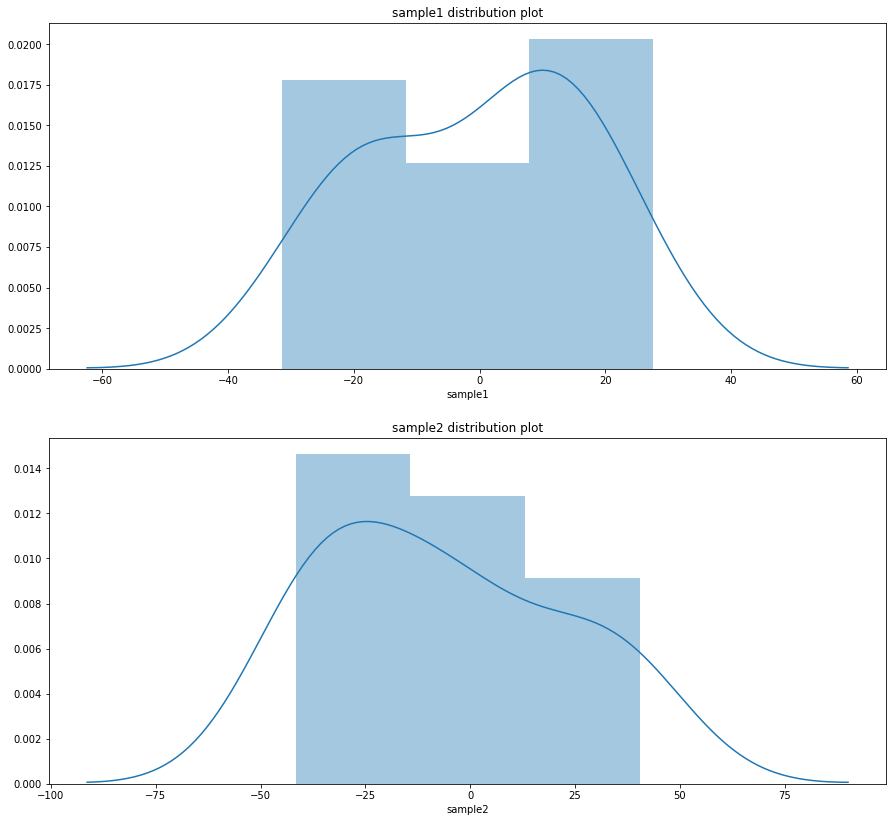

In [10]:
z0=plt.figure(figsize=(15,14))
z0.add_subplot(2,1,1)
sns.distplot(original.loc[:,'sample1'])
plt.title('sample1 distribution plot')
z0.add_subplot(2,1,2)
sns.distplot(original.loc[:,'sample2'])
plt.title('sample2 distribution plot')
plt.show()

# 敘述性統計

兩者皆為右偏,近似常態分配

sample1為低闊峰,sample2為高峽峰

sample2變異程度大於sample1


# 信賴區間

stats.sem 計算標準誤

stats.t.interval 計算95%信賴區間

stats.t.interval(信賴係數,自由度,mean,se(x))

20為小樣本,使用t分配

In [11]:
print('sample1 95%信賴區間')
stats.t.interval(0.95,original.index.shape[0]-1,loc=original.loc[:,'sample1'].mean(),scale=stats.sem(original.loc[:,'sample1']))

sample1 95%信賴區間


(-8.655900718911644, 7.962764376490925)

In [12]:
print('sample2 95%信賴區間')
stats.t.interval(0.95,original.index.shape[0]-1,loc=original.loc[:,'sample2'].mean(),scale=stats.sem(original.loc[:,'sample2']))

sample2 95%信賴區間


(-19.638311718726257, 7.019844769360109)

# 假說檢定

設sample1群體平均數為mu1,sample2群體平均數為mu2



H0:mu1=mu2



H1:mu1!=mu2



並設定alpha風險控制於0.05



scipy的ttest_ind為雙尾檢定,檢測兩群體間的差異(假設兩群體為獨立)



equal_var 預設為True,意指預設假設變異數為相同

In [14]:
hypo=np.array(stats.ttest_ind(original.loc[:,'sample1'],original.loc[:,'sample2']))
hypodf=pd.DataFrame()
hypodf['value']=hypo
i=['statistic','p-value']
hypodf.index=i
hypodf

,value
statistic,0.794551
p-value,0.431809


# 假說檢定

p-value 為 0.431,大於0.05,顯著

因此不棄卻H0

## one-way Anova

### 單因子變異數分析


檢測虛無假說群體間群體平均數無差異


H0:mu1=mu2=mu3


H1:mu1!=mu2!=mu3


alpha風險控制於0.05

In [15]:
n3=list(4.5*np.random.randn(1000)*8.25)
original['sample3']=random.sample(n3,20)
original.head()

,sample1,sample2,sample3
0,15.032696,-30.064565,-45.653113
1,-14.038998,33.003605,29.355050
2,-27.322717,-13.291741,-40.550740
3,-31.441101,-29.463809,35.109377
4,27.637059,-5.147494,25.342874


In [16]:
sam3des=np.array(stats.describe(original.loc[:,'sample3']))
des['sample3']=sam3des
des

,sample1,sample2,sample3
n,20,20,20
Min-Max,"(-31.44110106866779, 27.6370594414682)","(-41.669464399465014, 40.400309011079166)","(-74.1642408092372, 35.320725826582866)"
Mean,-0.346568,-6.30923,-6.12452
Variance,315.22,811.114,1091.58
skewness,-0.1977,0.357962,-0.459647
kurtosis,-1.18651,-1.2424,-0.774601


In [17]:
print('sample3 95%信賴區間')
stats.t.interval(0.95,original.index.shape[0]-1,loc=original.loc[:,'sample3'].mean(),scale=stats.sem(original.loc[:,'sample3']))

sample3 95%信賴區間


(-21.587281311178224, 9.3382349678268)

In [18]:
owanova=np.array(stats.f_oneway(original.loc[:,'sample1'],original.loc[:,'sample2'],original.loc[:,'sample3']))
OneWay=pd.DataFrame()
OneWay['value']=owanova
OneWay.index=['statistics','p-value']
OneWay

,value
statistics,0.310978
p-value,0.733965


## One-way anova

p-value>0.05,不棄卻H0假說

即群體平均數無明顯差異